In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os_df = pd.read_csv("./Datasets/os-very-clean.csv")
cs2_df = pd.read_csv("./Datasets/cs2-very-clean.csv")
os_df.drop(["QID11_8_TEXT", "QID19_5_TEXT", "QID45_12_TEXT"], axis=1, inplace=True)
cs2_df.drop(["QID11_8_TEXT", "QID19_5_TEXT", "QID45_12_TEXT"], axis=1, inplace=True)

allDF = pd.concat([os_df,cs2_df], ignore_index = True)

allDF.shape

(127, 54)

Index.txt has more information regarding the questions.

In [3]:
DEMOGRAPHICS = ["QID4", "QID66", "QID9", "QID11", "QID43", "QID10_TEXT"]
CONFIDENCE = ["QID27_4", "QID27_16","QID27_5","QID27_18","QID27_20", "QID27_21"]

AI_USE_TRUST = ["QID49_1", "QID49_2", "QID49_4", "QID49_5", "QID49_6", "QID49_7"]
AI_USE_CASES = ["QID46_1", "QID46_12", "QID46_3", "QID46_4", "QID46_10"]
AI_USE_EXPOSURE = ["QID64_1", "QID64_3", "QID64_6", "QID64_7", "QID64_8"]
WORRY_USE = ["QID64_7"]

AI_HEARD_TRUST = ["QID61_1", "QID61_2", "QID61_10", "QID61_5", "QID61_6", "QID61_7"]
AI_HEARD_EXPOSURE = [ "QID60_1", "QID60_3", "QID60_6", "QID60_7"]
WORRY_HEARD = ["QID60_7"]

HACKATHON_RANKINGS = ["QID39_1", "QID39_2", "QID39_3", "QID39_4", "QID39_5", "QID39_6"]

In [4]:
tempList = DEMOGRAPHICS + AI_USE_CASES

tempDF = allDF[tempList].dropna(inplace=False)
useCount = len(tempDF)

tempList = DEMOGRAPHICS + AI_HEARD_TRUST
tempDF = allDF[tempList].dropna(inplace=False)
heardCount = len(tempDF)

totalCount = len(allDF)

print(f"Proportions heard vs used: {heardCount/totalCount} vs {useCount/totalCount}")

Proportions heard vs used: 0.2125984251968504 vs 0.7874015748031497


In [5]:
corrDF = allDF.copy()
corrDF.drop(["QID19", "QID45", "QID62"], inplace=True, axis=1)
corr = corrDF.corr()
#plt.figure(figsize=(20,20))
#sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [6]:
allDF["QID11"].value_counts()

QID11
4    118
5      4
6      2
7      2
8      1
Name: count, dtype: int64

### Q1

In [7]:
useTrustDF = allDF[["QID13"] + AI_USE_TRUST]
useTrustDF.dropna(inplace=True)
useTrustDF.shape

(100, 7)

In [8]:
heardTrustDF = allDF[["QID13"] + AI_HEARD_TRUST]
heardTrustDF.dropna(inplace=True)
heardTrustDF.shape

(27, 7)

In [9]:
new_columns = {
    'QID13': 'User',
    'QID49_1': 'Trust1',
    'QID49_2': 'Trust2',
    'QID49_4': 'Trust3',
    'QID49_5': 'Trust4',
    'QID49_6': 'Trust5',
    'QID49_7': 'Trust6',
    'QID61_1': 'Trust1',
    'QID61_2': 'Trust2',
    'QID61_10': 'Trust3',
    'QID61_5': 'Trust4',
    'QID61_6': 'Trust5',
    'QID61_7': 'Trust6'
}

useTrustDF.rename(columns=new_columns, inplace=True)
heardTrustDF.rename(columns=new_columns, inplace=True)

In [10]:
trustDF = pd.concat([useTrustDF, heardTrustDF], ignore_index = True)

In [11]:
newTrustDF = trustDF.copy()
newTrustDF.drop(columns=["Trust1"], inplace=True) # drop experience, trust1 dropped due to similarity to another question
combinedTrust = []
for row in newTrustDF.iterrows():
    trustMean = row[1][1:].mean()
    combinedTrust.append(trustMean)
trustDF["TrustScore"] = combinedTrust
trustDF

,User,Trust1,Trust2,Trust3,Trust4,Trust5,Trust6,TrustScore
0,1,3.0,3.0,2.0,2.0,3.0,3.0,2.6
1,1,3.0,4.0,3.0,3.0,4.0,4.0,3.6
2,1,4.0,3.0,3.0,2.0,3.0,3.0,2.8
3,1,3.0,1.0,1.0,2.0,1.0,2.0,1.4
4,1,3.0,3.0,3.0,2.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...
122,2,3.0,4.0,4.0,3.0,3.0,3.0,3.4
123,2,4.0,4.0,4.0,4.0,4.0,4.0,4.0
124,2,2.0,1.0,3.0,3.0,2.0,1.0,2.0
125,2,4.0,4.0,4.0,2.0,3.0,3.0,3.2


In [12]:
# Get Trust Score above 3
distrust = len(trustDF[trustDF["TrustScore"] < 3])
neutral = len(trustDF[trustDF["TrustScore"] == 3])
trust = len(trustDF[trustDF["TrustScore"] > 3])
total = len(trustDF)
print("Distrust: ", distrust)
print("Neutral: ", neutral)
print("Trust: ", trust)
print("Total: ", total)
print("Distrust %: ", distrust/total)
print("Neutral %: ", neutral/total)
print("Trust %: ", trust/total)

Distrust:  48
Neutral:  23
Trust:  56
Total:  127
Distrust %:  0.3779527559055118
Neutral %:  0.18110236220472442
Trust %:  0.4409448818897638


In [13]:
trustMean = trustDF.groupby("User").mean()
trustMean

,Trust1,Trust2,Trust3,Trust4,Trust5,Trust6,TrustScore
User,,,,,,,
1,3.240000,3.020000,3.430000,2.610000,3.070000,3.370000,3.10000
2,2.851852,2.777778,3.185185,2.925926,2.703704,2.555556,2.82963


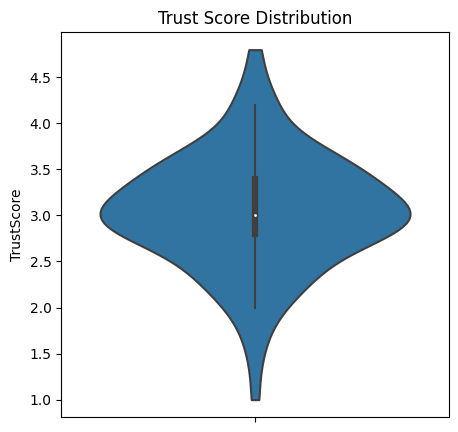

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
sns.violinplot(y="TrustScore", data=trustDF, cut=0)
plt.title("Trust Score Distribution")
plt.savefig("./Figures/TrustScore.png")

### Q2

In [15]:
perceptionOfHelpful = allDF[["QID13"] + AI_USE_CASES]
perceptionOfHelpful.dropna(inplace=True)

In [16]:
new_columns = {
    "QID13": "User",
    "QID46_1": "Helps Complete Tasks",
    "QID46_12": "Helps When Stuck",
    "QID46_3": "Helps Learn Concepts",
    "QID46_4": "Makes Me More Confident",
    "QID46_10": "Overall improved motivation and engagement",
}

perceptionOfHelpful.rename(columns=new_columns, inplace=True)

In [17]:
perceptionOfHelpful.describe()

,User,Helps Complete Tasks,Helps When Stuck,Helps Learn Concepts,Makes Me More Confident,Overall improved motivation and engagement
count,100.0,100.000000,100.000000,100.00000,100.000000,100.000000
mean,1.0,3.620000,3.900000,3.94000,3.540000,3.710000
std,0.0,0.918717,0.870388,0.83871,1.019209,0.945964
min,1.0,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.0,3.000000,4.000000,4.00000,3.000000,3.000000
50%,1.0,4.000000,4.000000,4.00000,4.000000,4.000000
75%,1.0,4.000000,4.000000,4.00000,4.000000,4.000000
max,1.0,5.000000,5.000000,5.00000,5.000000,5.000000


In [18]:
perceptionOfHelpful.mean()

User                                          1.00
Helps Complete Tasks                          3.62
Helps When Stuck                              3.90
Helps Learn Concepts                          3.94
Makes Me More Confident                       3.54
Overall improved motivation and engagement    3.71
dtype: float64

In [19]:
tempDF = perceptionOfHelpful.drop(columns=["User", "Overall improved motivation and engagement", "Helps When Stuck", "Makes Me More Confident"])
for i in tempDF.columns:
    print(i, tempDF[i].value_counts())
    print(f"Median of {i}: {tempDF[i].median()}")

Helps Complete Tasks Helps Complete Tasks
4.0    52
3.0    26
5.0    12
2.0     6
1.0     4
Name: count, dtype: int64
Median of Helps Complete Tasks: 4.0
Helps Learn Concepts Helps Learn Concepts
4.0    61
5.0    21
3.0    11
2.0     5
1.0     2
Name: count, dtype: int64
Median of Helps Learn Concepts: 4.0


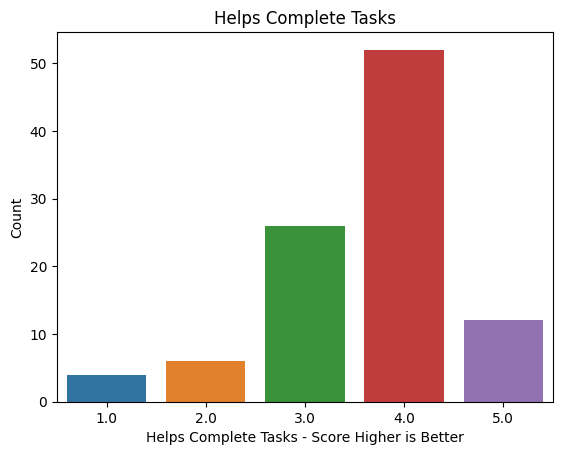

In [20]:
sns.countplot(x="Helps Complete Tasks", data=perceptionOfHelpful)
plt.title("Helps Complete Tasks")
plt.xlabel("Helps Complete Tasks - Score Higher is Better")
plt.ylabel("Count")
plt.savefig("./Figures/HelpsCompleteTasks.png")

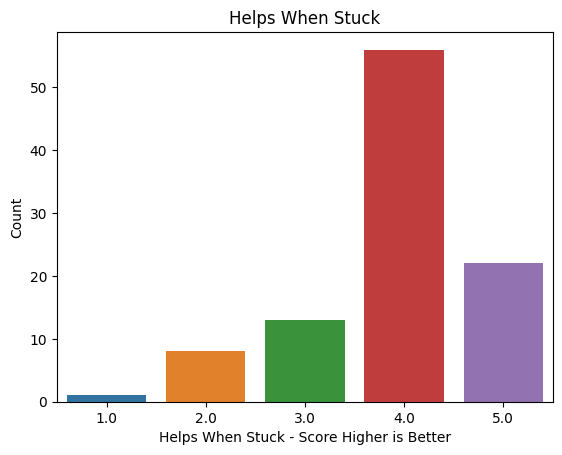

In [21]:
sns.countplot(x="Helps When Stuck", data=perceptionOfHelpful)
plt.title("Helps When Stuck")
plt.xlabel("Helps When Stuck - Score Higher is Better")
plt.ylabel("Count")
plt.savefig("./Figures/HelpsWhenStuck.png")

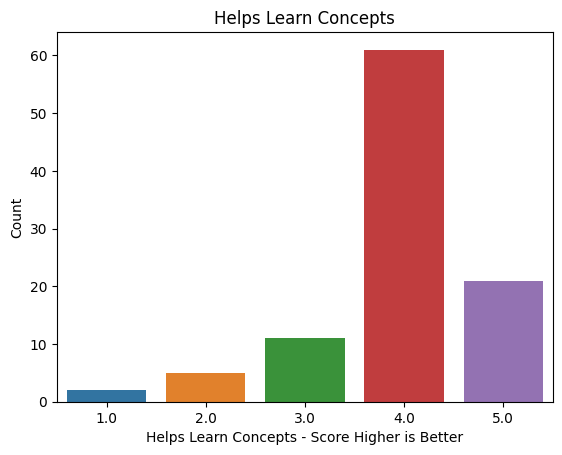

In [22]:
sns.countplot(x="Helps Learn Concepts", data=perceptionOfHelpful)
plt.title("Helps Learn Concepts")
plt.xlabel("Helps Learn Concepts - Score Higher is Better")
plt.ylabel("Count")
plt.savefig("./Figures/HelpsLearnConcepts.png")

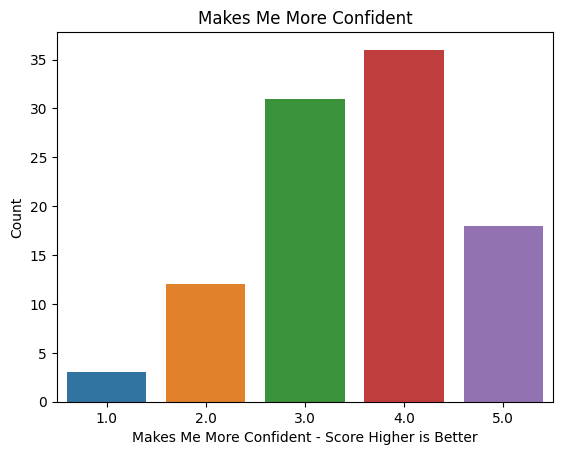

In [23]:
sns.countplot(x="Makes Me More Confident", data=perceptionOfHelpful)
plt.title("Makes Me More Confident")
plt.xlabel("Makes Me More Confident - Score Higher is Better")
plt.ylabel("Count")
plt.savefig("./Figures/MakesMeMoreConfident.png")

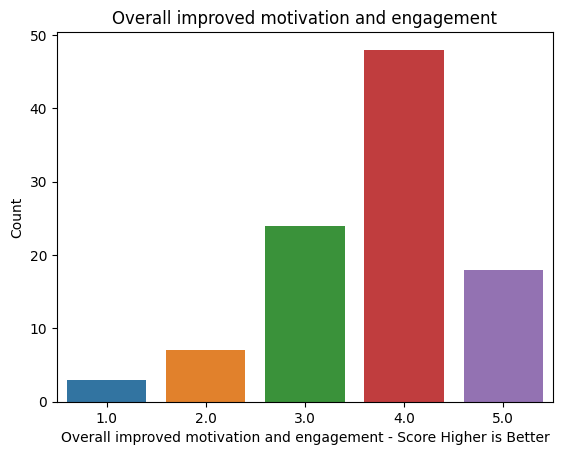

In [24]:
sns.countplot(x="Overall improved motivation and engagement", data=perceptionOfHelpful)
plt.title("Overall improved motivation and engagement")
plt.xlabel("Overall improved motivation and engagement - Score Higher is Better")
plt.ylabel("Count")
plt.savefig("./Figures/OverallImprovedMotivationAndEngagement.png")

### Q3

In [25]:
perceptionOfTools = allDF[["QID13"] + AI_USE_EXPOSURE]
perceptionOfTools.dropna(inplace=True)

In [26]:
perceptionOfTools2 = allDF[["QID13"] + AI_HEARD_EXPOSURE]
perceptionOfTools2.dropna(inplace=True)

In [27]:
new_columns = {
    'QID13': 'User',
    'QID64_1': 'Encouraged',
    'QID64_3': 'Professional',
    'QID64_6': 'Others Use',
    'QID64_7': 'Worry',
    'QID64_8': 'Lesser',
    'QID60_1': 'Encouraged',
    'QID60_3': 'Professional',
    'QID60_6': 'Others Use',
    'QID60_7': 'Worry',
}

perceptionOfTools.rename(columns=new_columns, inplace=True)
perceptionOfTools2.rename(columns=new_columns, inplace=True)

In [28]:
perceptionOfTools.describe()

,User,Encouraged,Professional,Others Use,Worry,Lesser
count,100.0,100.000000,100.000000,100.00000,100.000000,100.000000
mean,1.0,3.220000,3.480000,4.01000,2.790000,2.800000
std,0.0,0.959587,0.846621,0.73161,1.233333,1.163415
min,1.0,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.0,3.000000,3.000000,4.00000,2.000000,2.000000
50%,1.0,3.000000,4.000000,4.00000,3.000000,3.000000
75%,1.0,4.000000,4.000000,4.00000,4.000000,4.000000
max,1.0,5.000000,5.000000,5.00000,5.000000,5.000000


In [29]:
perceptionOfTools2.describe()

,User,Encouraged,Professional,Others Use,Worry
count,27.0,27.000000,27.000000,27.000000,27.000000
mean,2.0,2.851852,2.925926,3.666667,3.222222
std,0.0,1.063510,0.675160,1.143544,1.219500
min,2.0,1.000000,2.000000,1.000000,1.000000
25%,2.0,2.000000,2.500000,3.500000,2.000000
50%,2.0,3.000000,3.000000,4.000000,3.000000
75%,2.0,3.000000,3.000000,4.000000,4.000000
max,2.0,5.000000,4.000000,5.000000,5.000000


In [30]:
perceptionOfTools = pd.concat([perceptionOfTools, perceptionOfTools2], ignore_index = True)
perceptionOfTools["User"] = perceptionOfTools["User"].replace({1: "User", 2: "Non-User"})
#perceptionOfTools

In [31]:
tempDF = perceptionOfTools.drop(columns=["User", "Encouraged", "Others Use", "Lesser"])
for i in tempDF.columns:
    vals = tempDF[i].value_counts()
    print(i)
    for j in vals.index:
        print(f"{j}   {((vals[j]/len(tempDF))*100):.2f}%")
    print(f"Median of {i}: {tempDF[i].median()}")

Professional
3.0   42.52%
4.0   37.01%
2.0   11.81%
5.0   7.09%
1.0   1.57%
Median of Professional: 3.0
Worry
2.0   31.50%
4.0   24.41%
3.0   19.69%
1.0   13.39%
5.0   11.02%
Median of Worry: 3.0


In [32]:
tempDF = perceptionOfTools.drop(columns=["Encouraged", "Others Use", "Lesser"])
tempDF = tempDF[tempDF["User"] == "Non-User"].drop(columns=["User"])
for i in tempDF.columns:
    vals = tempDF[i].value_counts()
    print(i)
    for j in vals.index:
        print(f"{j}   {((vals[j]/len(tempDF))*100):.2f}%")
    print(f"Median of {i}: {tempDF[i].median()}")

Professional
3.0   55.56%
2.0   25.93%
4.0   18.52%
Median of Professional: 3.0
Worry
4.0   33.33%
2.0   25.93%
3.0   18.52%
5.0   14.81%
1.0   7.41%
Median of Worry: 3.0


In [33]:
perceptionOfToolsMean = perceptionOfTools.groupby("User").mean()
perceptionOfToolsMean

,Encouraged,Professional,Others Use,Worry,Lesser
User,,,,,
Non-User,2.851852,2.925926,3.666667,3.222222,NaN
User,3.220000,3.480000,4.010000,2.790000,2.8


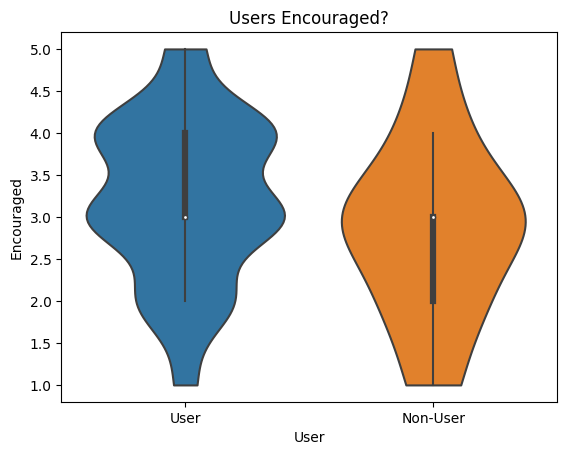

In [34]:
sns.violinplot(x="User", y="Encouraged", data=perceptionOfTools, cut=0)
plt.title("Users Encouraged?")
plt.savefig("./Figures/Encouraged.png")

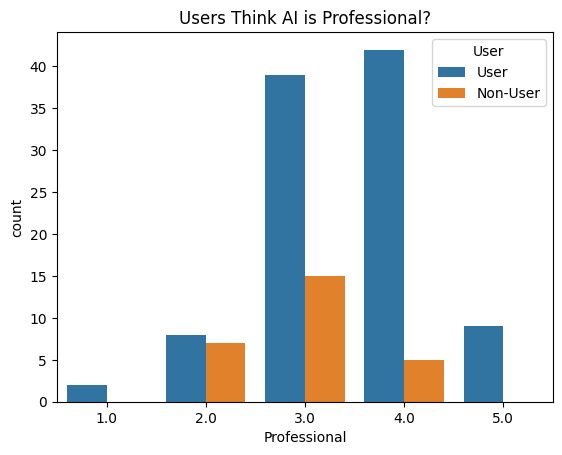

In [35]:
sns.countplot(x="Professional", hue="User", data=perceptionOfTools)
plt.title("Users Think AI is Professional?")
plt.savefig("./Figures/Professional.png")

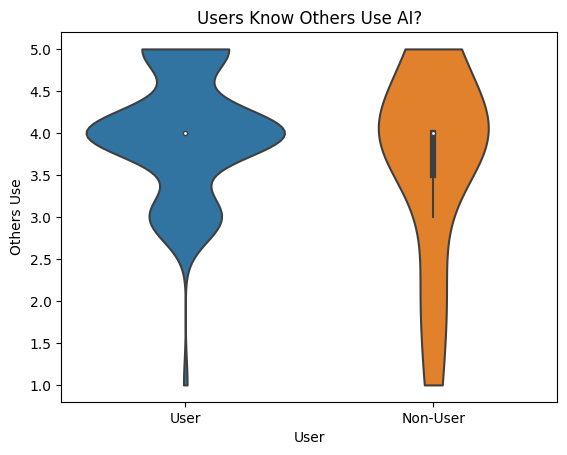

In [36]:
sns.violinplot(x="User", y="Others Use", data=perceptionOfTools, cut=0)
plt.title("Users Know Others Use AI?")
plt.savefig("./Figures/OthersUse.png")

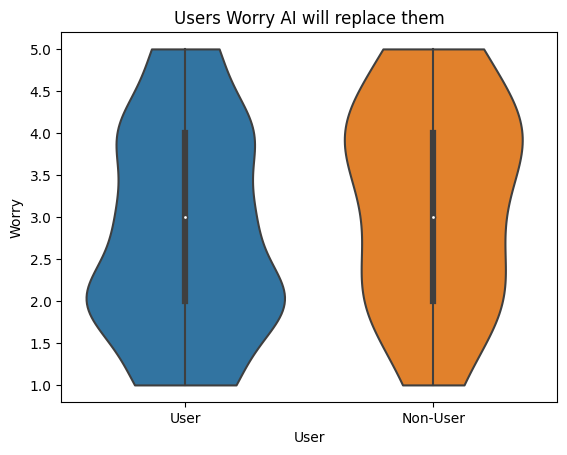

In [37]:
sns.violinplot(x="User", y="Worry", data=perceptionOfTools, cut=0)
plt.title("Users Worry AI will replace them")
plt.savefig("./Figures/Worry.png")

### Q4

In [38]:
perceptionConfidence = allDF[["QID13"] + CONFIDENCE]
perceptionConfidence.dropna(inplace=True)

In [39]:
perceptionConfidence.columns

Index(['QID13', 'QID27_4', 'QID27_16', 'QID27_5', 'QID27_18', 'QID27_20',
       'QID27_21'],
      dtype='object')

In [40]:
new_columns = {
    'QID13': 'User',
    'QID27_4': 'Complete tasks alone',
    'QID27_16': 'Complete tasks when working with someone',
    'QID27_5': 'Complete tasks when they have someone to help',
    'QID27_18': 'Finding steps to solve a problem',
    'QID27_20': 'Finding ways out when they are stuck on a problem',
}

perceptionConfidence.rename(columns=new_columns, inplace=True)
perceptionConfidence.drop(columns=["QID27_21"], inplace=True)

In [41]:
perceptionConfidence["User"] = perceptionConfidence["User"].replace({1: "User", 2: "Non-User"})

In [42]:
perceptionConfidence.describe()

,Complete tasks alone,Complete tasks when working with someone,Complete tasks when they have someone to help,Finding steps to solve a problem,Finding ways out when they are stuck on a problem
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,3.539683,4.158730,4.357143,3.857143,3.714286
std,1.032673,0.833429,0.814511,0.873744,1.002853
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.000000,3.250000,3.000000
50%,4.000000,4.000000,5.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [43]:
perceptionConfidenceMean = perceptionConfidence.groupby("User").mean()
perceptionConfidenceMean

,Complete tasks alone,Complete tasks when working with someone,Complete tasks when they have someone to help,Finding steps to solve a problem,Finding ways out when they are stuck on a problem
User,,,,,
Non-User,3.481481,4.00000,4.333333,3.740741,3.518519
User,3.555556,4.20202,4.363636,3.888889,3.767677


In [44]:
tempDF = perceptionConfidence.drop(columns=["Complete tasks when working with someone", "Complete tasks when they have someone to help"])
tempDF = tempDF[tempDF["User"] == "Non-User"].drop(columns=["User"])
for i in tempDF.columns:
    vals = tempDF[i].value_counts()
    print(i)
    for j in vals.index:
        print(f"{j}   {((vals[j]/len(tempDF))*100):.2f}%")
    print(f"Median of {i}: {tempDF[i].median()}")

Complete tasks alone
4   40.74%
3   22.22%
2   22.22%
5   14.81%
Median of Complete tasks alone: 4.0
Finding steps to solve a problem
4.0   59.26%
5.0   14.81%
2.0   14.81%
3.0   11.11%
Median of Finding steps to solve a problem: 4.0
Finding ways out when they are stuck on a problem
4   37.04%
3   25.93%
5   18.52%
2   14.81%
1   3.70%
Median of Finding ways out when they are stuck on a problem: 4.0


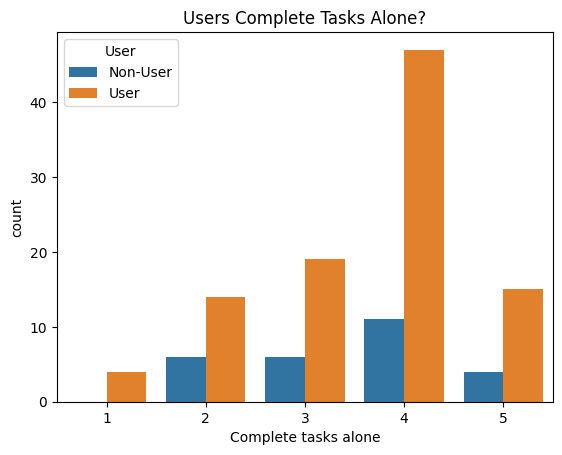

In [45]:
sns.countplot(x="Complete tasks alone", hue="User", data=perceptionConfidence)
plt.title("Users Complete Tasks Alone?")
plt.savefig("./Figures/CompleteTasksAlone.png")

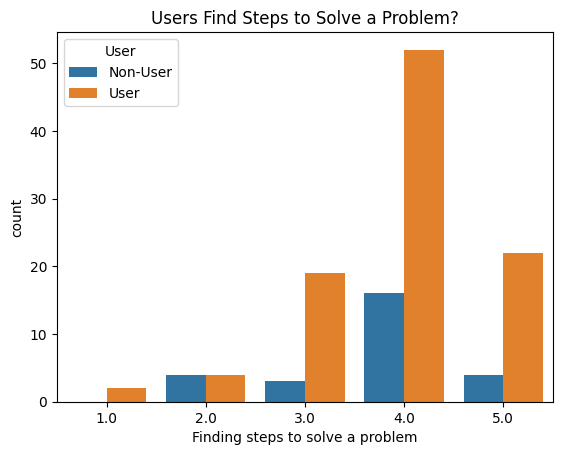

In [46]:
sns.countplot(x="Finding steps to solve a problem", hue="User", data=perceptionConfidence)
plt.title("Users Find Steps to Solve a Problem?")
plt.savefig("./Figures/FindingStepsToSolveAProblem.png")

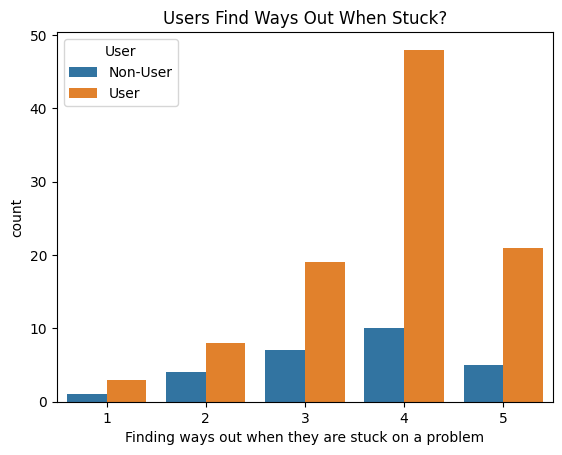

In [47]:
sns.countplot(x="Finding ways out when they are stuck on a problem", hue="User", data=perceptionConfidence)
plt.title("Users Find Ways Out When Stuck?")
plt.savefig("./Figures/FindingWaysOutWhenStuck.png")

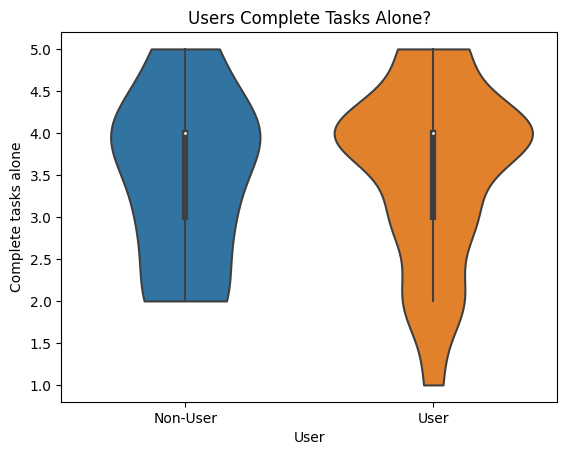

In [48]:
sns.violinplot(x="User", y="Complete tasks alone", data=perceptionConfidence, cut=0)
plt.title("Users Complete Tasks Alone?")
plt.savefig("./Figures/CompleteTasksAlone.png")

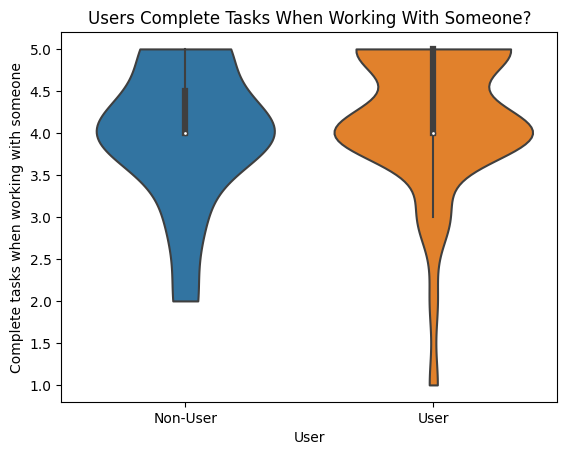

In [49]:
sns.violinplot(x="User", y="Complete tasks when working with someone", data=perceptionConfidence, cut=0)
plt.title("Users Complete Tasks When Working With Someone?")
plt.savefig("./Figures/CompleteTasksWhenWorkingWithSomeone.png")

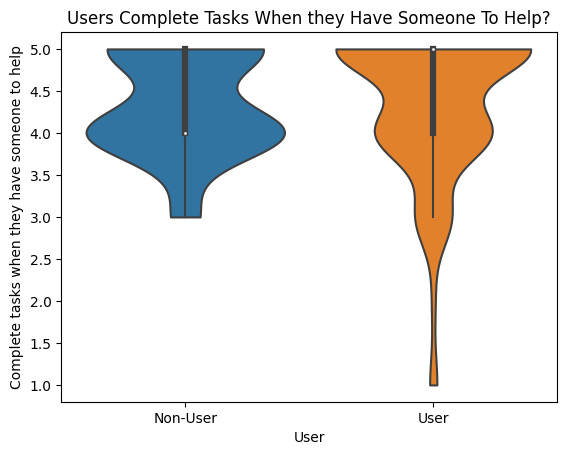

In [50]:
sns.violinplot(x="User", y="Complete tasks when they have someone to help", data=perceptionConfidence, cut=0)
plt.title("Users Complete Tasks When they Have Someone To Help?")
plt.savefig("./Figures/CompleteTasksWhenIHaveSomeoneToHelp.png")

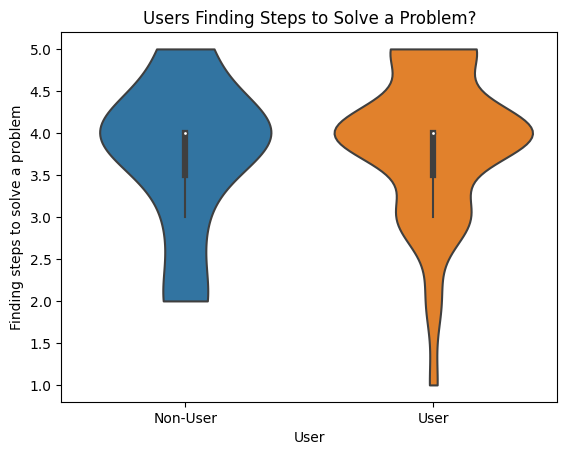

In [51]:
sns.violinplot(x="User", y="Finding steps to solve a problem", data=perceptionConfidence, cut=0)
plt.title("Users Finding Steps to Solve a Problem?")
plt.savefig("./Figures/FindingStepsToSolveAProblem.png")

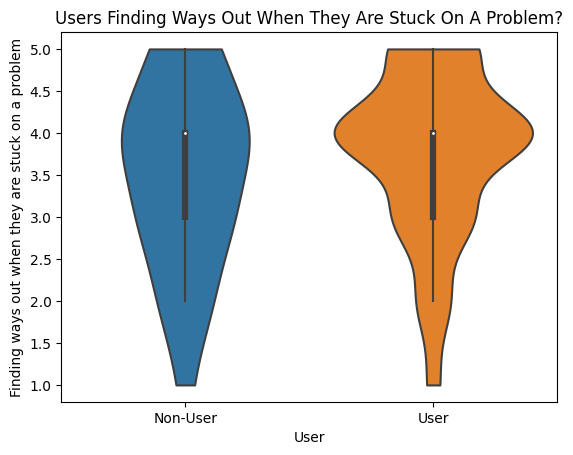

In [52]:
sns.violinplot(x="User", y="Finding ways out when they are stuck on a problem", data=perceptionConfidence, cut=0)
plt.title("Users Finding Ways Out When They Are Stuck On A Problem?")
plt.savefig("./Figures/FindingWaysOutWhenTheyAreStuckOnAProblem.png")